In [1]:
import pandas as pd
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
xml_file = et.parse('../data/quran-simple.xml')

In [3]:
root = xml_file.getroot()

In [4]:
columns = ['Surah Name', 'Surah Number', 'Verse Number', 'Verse Text']

In [5]:
df = pd.DataFrame(columns=columns)

for sura_element in root:
    sura_num = int(sura_element.attrib.get('index'))
    sura_name = sura_element.attrib.get('name')
    for verse_element in sura_element:
        verse_num = int(verse_element.get('index'))
        verse_text = verse_element.get('text')
        df = df.append(pd.Series([sura_name, sura_num, verse_num, verse_text], index=columns),
                      ignore_index=True)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114


In [21]:
print(len(df))

6236


In [8]:
for index, group in df.groupby(['Surah Number']):
    print(index, len(group))

1 7
2 286
3 200
4 176
5 120
6 165
7 206
8 75
9 129
10 109
11 123
12 111
13 43
14 52
15 99
16 128
17 111
18 110
19 98
20 135
21 112
22 78
23 118
24 64
25 77
26 227
27 93
28 88
29 69
30 60
31 34
32 30
33 73
34 54
35 45
36 83
37 182
38 88
39 75
40 85
41 54
42 53
43 89
44 59
45 37
46 35
47 38
48 29
49 18
50 45
51 60
52 49
53 62
54 55
55 78
56 96
57 29
58 22
59 24
60 13
61 14
62 11
63 11
64 18
65 12
66 12
67 30
68 52
69 52
70 44
71 28
72 28
73 20
74 56
75 40
76 31
77 50
78 40
79 46
80 42
81 29
82 19
83 36
84 25
85 22
86 17
87 19
88 26
89 30
90 20
91 15
92 21
93 11
94 8
95 8
96 19
97 5
98 8
99 8
100 11
101 11
102 8
103 3
104 9
105 5
106 4
107 7
108 3
109 6
110 3
111 5
112 4
113 5
114 6


Text(0, 0.5, 'Number of Verses')

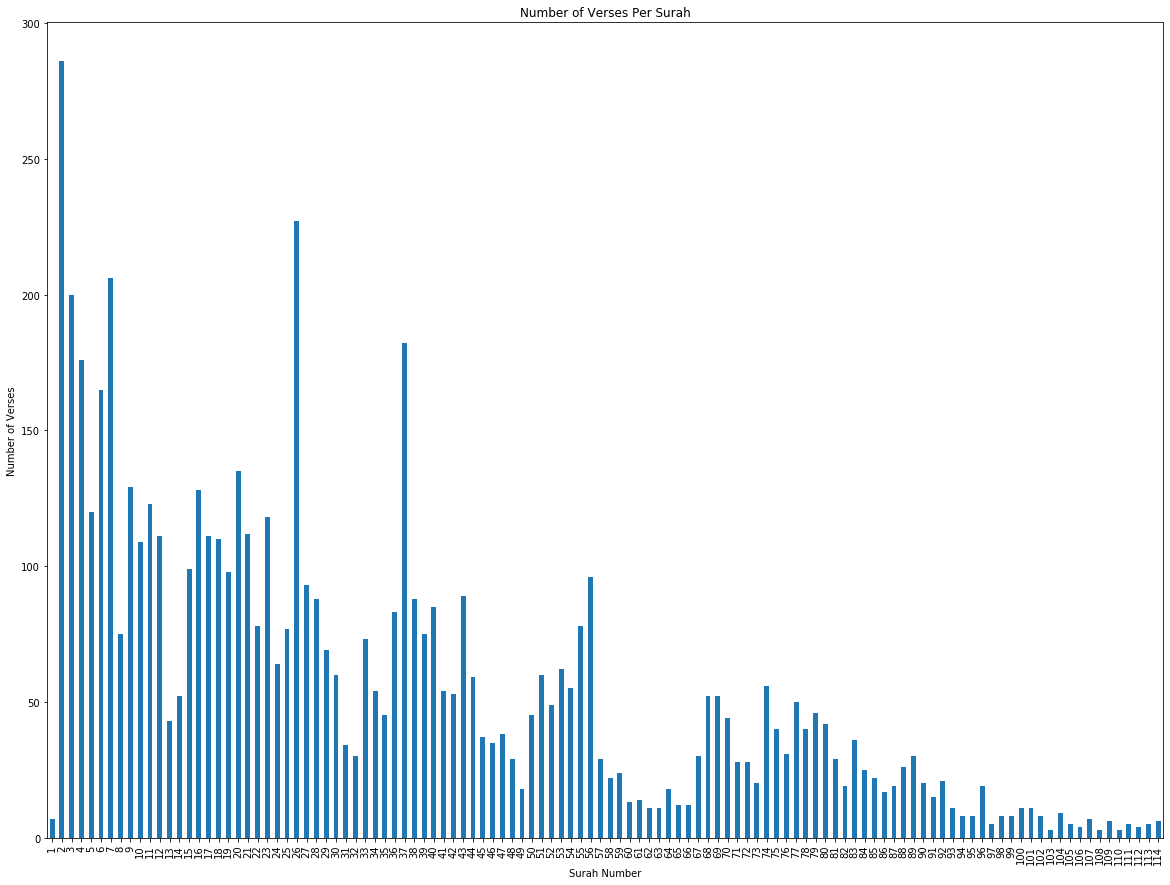

In [13]:
ax = df.groupby(['Surah Number']).size().plot(kind='bar', figsize=(20, 15), title='Number of Verses Per Surah')
ax.set_ylabel('Number of Verses')

In [17]:
df.to_csv('../data/quran_data.csv', index=False)

In [18]:
loaded_df = pd.read_csv('../data/quran_data.csv')

In [19]:
loaded_df.head()

,Surah Name,Surah Number,Verse Number,Verse Text
0,الفاتحة,1,1,بِسْمِ اللَّهِ الرَّحْمَنِ الرَّحِيمِ
1,الفاتحة,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ
2,الفاتحة,1,3,الرَّحْمَنِ الرَّحِيمِ
3,الفاتحة,1,4,مَالِكِ يَوْمِ الدِّينِ
4,الفاتحة,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ
